In [2]:
import numpy as np
import pandas as pd # Read data

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.linear_model import LogisticRegression

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%f' % float(height),
        ha='center', va='bottom')

In [3]:
def getModel (news):
    news['TITLE'] = news['TITLE'].str.replace('[^\w\s]', '').str.lower()  # Remove punctuation and replace upper letter
    vectorizer = CountVectorizer(stop_words='english')  # Initial the vectorizer
    x_train, x_test, y_train, y_test = train_test_split(news['TITLE'], news['CATEGORY'], test_size=0.1)  # 10% split
    x_train = vectorizer.fit_transform(x_train.values.astype('U'))  # transform the format of training data
    model = MultinomialNB(alpha=0.1)  # Initial the model
    model.fit(x_train, y_train)  # Training data
    return model, vectorizer, x_test, y_test

In [16]:
def getMost3ClassAccuracy(model, vectorizer, x_test, y_test):
    count = 0
    x_test = vectorizer.transform(x_test.values.astype('U'))
    results = model.predict_proba(x_test)  # Get the probability vector
    for i in range(len(results)):
        index = results[i].ravel().argsort()[-1:-3 - 1:-1]
        if str(y_test.tolist()[i]) in list(model.classes_[index]):
            count = count + 1
    return count / len(results)

In [19]:
def getInputClasses(input, model, vectorizer):
    print('\n' + 'Sample input is: ' + input + '\n')
    real_input = vectorizer.transform(pd.Series(input).str.replace('[^\w\s]', '').str.lower().values.astype('U'))
    print('We predict it as: ' + str(model.predict(real_input)) + '\n')
    print("It's probability vector is:" + '\n')
    result = model.predict_proba(real_input)
    for i in range(len(model.classes_)):
        print(str(model.classes_[i]) + ": " + str(result[0][i]))
    index = result.ravel().argsort()[-1:-3 - 1:-1]
    print()
    print("It's highest 3 probability classes are: " + str(model.classes_[index]))

In [3]:
# Read data from file
data = pd.read_csv('News_Category_Dataset_v2.csv');
data.head()

,category,headline,link,short_description
0,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...
1,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...
2,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ..."
3,ENTERTAINMENT,Morgan Freeman 'Devastated' That Sexual Harass...,https://www.huffingtonpost.com/entry/morgan-fr...,"""It is not right to equate horrific incidents ..."
4,ENTERTAINMENT,Donald Trump Is Lovin' New McDonald's Jingle I...,https://www.huffingtonpost.com/entry/donald-tr...,"It's catchy, all right."


In [4]:
data['category'].unique()

array(['ENTERTAINMENT', 'WORLD NEWS', 'IMPACT', 'POLITICS', 'WEIRD NEWS',
       'BLACK VOICES', 'CRIME', 'WOMEN', 'COMEDY', 'QUEER VOICES',
       'SPORTS', 'BUSINESS', 'TRAVEL', 'MEDIA', 'TECH', 'RELIGION',
       'SCIENCE', 'LATINO VOICES', 'EDUCATION', 'COLLEGE', 'PARENTS',
       'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE', 'HEALTHY LIVING',
       'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST', 'FIFTY', 'ARTS',
       'WELLNESS', 'PARENTING', 'HOME & LIVING', 'STYLE & BEAUTY',
       'DIVORCE', 'WEDDINGS', 'FOOD & DRINK', 'MONEY', 'ENVIRONMENT',
       'CULTURE & ARTS'], dtype=object)

Text(0,0.5,'Category')

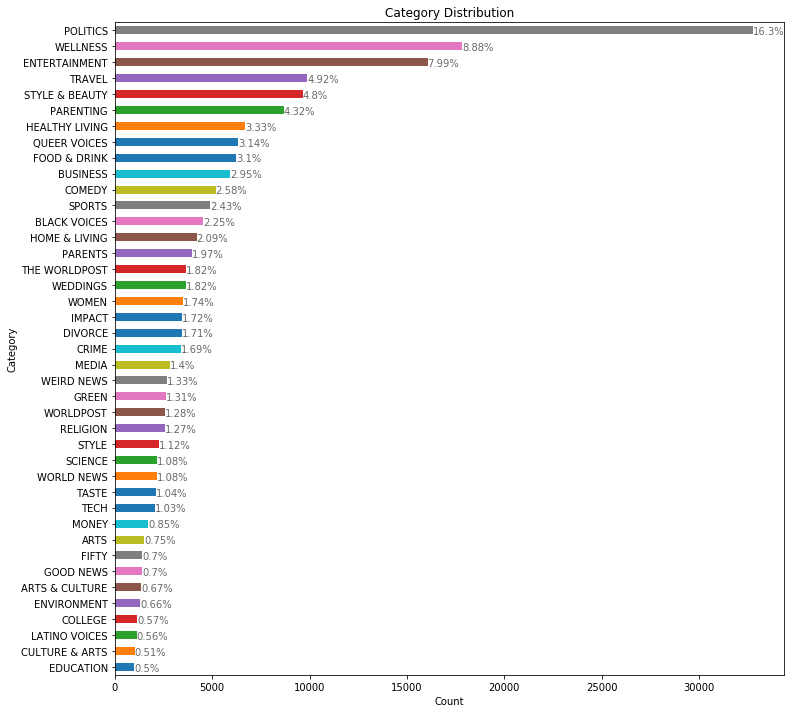

In [57]:
# plot data
data_chart = data.category.value_counts().sort_values().plot(kind='barh', figsize = (12, 12))

# Calculate percentage
totals = []

for i in data_chart.patches:
    totals.append(i.get_width())
    
total = sum(totals)

for i in data_chart.patches:
    data_chart.text(i.get_width(), i.get_y(), str(round((i.get_width()/total)*100, 2))+'%', color='dimgrey')

plt.title('Category Distribution')
plt.xlabel('Count')
plt.ylabel('Category')

In [22]:
news4 = pd.read_csv('News_Category_Dataset_v4.csv')
news8 = pd.read_csv('News_Category_Dataset_v8.csv')
news20 = pd.read_csv('News_Category_Dataset_v20.csv')
news41 = pd.read_csv('News_Category_Dataset_v41.csv')

model4, vectorizer4, x_test4, y_test4 = getModel(news4)
model8, vectorizer8, x_test8, y_test8 = getModel(news8)
model20, vectorizer20, x_test20, y_test20 = getModel(news20)
model41, vectorizer41, x_test41, y_test41 = getModel(news41)

score4 = model4.score(vectorizer4.transform(x_test4.values.astype('U')), y_test4)
score8 = model8.score(vectorizer8.transform(x_test8.values.astype('U')), y_test8)
score20 = model20.score(vectorizer20.transform(x_test20.values.astype('U')), y_test20)
score41 = model41.score(vectorizer41.transform(x_test41.values.astype('U')), y_test41)
score = [score4, score8, score20, score41]

print('4 classes are:   ' + str(news4['CATEGORY'].unique()))
print('8 classes are:   ' + str(news8['CATEGORY'].unique()))
print('20 classes are:  ' + str(news20['CATEGORY'].unique()))
print('41 classes are:  ' + str(news41['CATEGORY'].unique()))
print('\naccuracy of choosing 1 class from 4 classes:     ' + str(score4))
print('accuracy of choosing 1 class from 8 classes:     ' + str(score8))
print('accuracy of choosing 1 class from 20 classes:    ' + str(score20))
print('accuracy of choosing 1 class from 41 classes:    ' + str(score41))

4 classes are:   ['ENTERTAINMENT' 'POLITICS' 'TRAVEL' 'WELLNESS']
8 classes are:   ['ENTERTAINMENT' 'POLITICS' 'BLACK VOICES' 'TRAVEL' 'HEALTHY LIVING'
 'WELLNESS' 'PARENTING' 'STYLE & BEAUTY']
20 classes are:  ['ENTERTAINMENT' 'WORLD NEWS' 'IMPACT' 'POLITICS' 'WEIRD NEWS'
 'BLACK VOICES' 'CRIME' 'WOMEN' 'COMEDY' 'QUEER VOICES' 'SPORTS'
 'BUSINESS' 'TRAVEL' 'MEDIA' 'TECH' 'RELIGION' 'SCIENCE' 'LATINO VOICES'
 'EDUCATION' 'COLLEGE']
41 classes are:  ['ENTERTAINMENT' 'WORLD NEWS' 'IMPACT' 'POLITICS' 'WEIRD NEWS'
 'BLACK VOICES' 'CRIME' 'WOMEN' 'COMEDY' 'QUEER VOICES' 'SPORTS'
 'BUSINESS' 'TRAVEL' 'MEDIA' 'TECH' 'RELIGION' 'SCIENCE' 'LATINO VOICES'
 'EDUCATION' 'COLLEGE' 'PARENTS' 'ARTS & CULTURE' 'STYLE' 'GREEN' 'TASTE'
 'HEALTHY LIVING' 'THE WORLDPOST' 'GOOD NEWS' 'WORLDPOST' 'FIFTY' 'ARTS'
 'WELLNESS' 'PARENTING' 'HOME & LIVING' 'STYLE & BEAUTY' 'DIVORCE'
 'WEDDINGS' 'FOOD & DRINK' 'MONEY' 'ENVIRONMENT' 'CULTURE & ARTS']

accuracy of choosing 1 class from 4 classes:     0.8942621879492

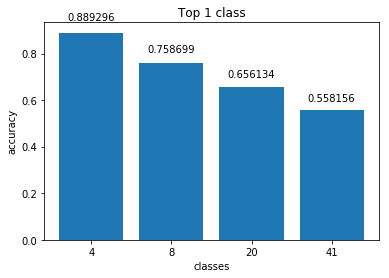

In [15]:
classes = ['4', '8', '20', '41']

fig, ax = plt.subplots()
plt.xticks(range(len(classes)), classes)
chart = ax.bar(range(len(classes)), score)
autolabel(chart)
plt.xlabel('classes')
plt.ylabel('accuracy')
plt.title('Top 1 class')
plt.show()

In [17]:
most3score4 = getMost3ClassAccuracy(model4, vectorizer4, x_test4, y_test4)
most3score8 = getMost3ClassAccuracy(model8, vectorizer8, x_test8, y_test8)
most3score20 = getMost3ClassAccuracy(model20, vectorizer20, x_test20, y_test20)
most3score41 = getMost3ClassAccuracy(model41, vectorizer41, x_test41, y_test41)
most3score = [most3score4, most3score8, most3score20, most3score41]

print('accuracy of choosing 3 class from 4 classes:     ' + str(most3score4))
print('accuracy of choosing 3 class from 8 classes:     ' + str(most3score8))
print('accuracy of choosing 3 class from 20 classes:    ' + str(most3score20))
print('accuracy of choosing 3 class from 41 classes:    ' + str(most3score41))

accuracy of choosing 3 class from 4 classes:     0.9915043785126127
accuracy of choosing 3 class from 8 classes:     0.945025931164545
accuracy of choosing 3 class from 20 classes:    0.8590036965323007
accuracy of choosing 3 class from 41 classes:    0.777733519219279


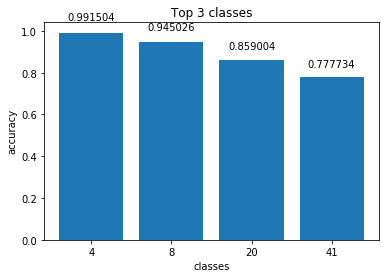

In [18]:
classes = ['4', '8', '20', '41']

fig, ax = plt.subplots()
plt.xticks(range(len(classes)), classes)
chart = ax.bar(range(len(classes)), most3score)
autolabel(chart)
plt.xlabel('classes')
plt.ylabel('accuracy')
plt.title('Top 3 classes')
plt.show()

In [20]:
input = 'A Dizzyingly High Rooftop Infinity Pool Is Coming to London, and It Will Have 360-degree Skyline Views'
getInputClasses(input, model41, vectorizer41)


Sample input is: A Dizzyingly High Rooftop Infinity Pool Is Coming to London, and It Will Have 360-degree Skyline Views

We predict it as: ['TRAVEL']

It's probability vector is:

ARTS: 6.084775418093567e-08
ARTS & CULTURE: 1.3460669422505812e-06
BLACK VOICES: 7.14935241221283e-11
BUSINESS: 5.001533723832645e-09
COLLEGE: 9.003626836057202e-10
COMEDY: 9.094521429893277e-08
CRIME: 3.327527152986436e-08
CULTURE & ARTS: 1.233570618276474e-07
DIVORCE: 2.4336032813538272e-11
EDUCATION: 7.370658039212875e-10
ENTERTAINMENT: 4.651590745681622e-05
ENVIRONMENT: 5.060855006804932e-10
FIFTY: 3.9690715806681247e-10
FOOD & DRINK: 2.1788700732308495e-10
GOOD NEWS: 1.3583625877326086e-09
GREEN: 9.520192010291848e-09
HEALTHY LIVING: 6.593061220893617e-09
HOME & LIVING: 7.760364408327717e-06
IMPACT: 3.969358070974226e-09
LATINO VOICES: 7.004482544078623e-10
MEDIA: 4.388533183574141e-08
MONEY: 8.514654015094987e-10
PARENTING: 2.300516214576456e-09
PARENTS: 5.948299120203852e-10
POLITICS: 3.97228548584800